<a href="https://colab.research.google.com/github/oneScotch/28_aNTiUlearn/blob/main/MaskDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Oct 16 03:34:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import os 
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/"
os.chdir(path)
os.listdir(path) 

Mounted at /content/drive


['Makefile (3)',
 'colab',
 'yolov4.weights',
 'Makefile (2)',
 'Makefile (1)',
 'Makefile',
 'Colab Notebooks']

In [ ]:
! gdown https://drive.google.com/uc?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/gdown/cli.py", line 61, in main
    quiet=args.quiet,
  File "/usr/local/lib/python2.7/dist-packages/gdown/download.py", line 52, in download
    res = sess.get(url, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 543, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 530, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 665, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 245, in resolve_redirects
    **adapter_kwargs
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 643, in send
    r = adapter.send(request, **kwargs)

In [3]:
! gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/drive/My Drive/yolov4.weights
100% 258M/258M [00:02<00:00, 127MB/s]


In [5]:
%cd colab/darknet/
%ls

/content/drive/.shortcut-targets-by-id/129Ay-XXFkmn3l1LnSbYIAv80m9e5CIAX/colab/darknet
3rdparty/                darknet_images.py      net_cam_v3.sh
backup/                  darknet.py             net_cam_v4.sh
build/                   darknet_video.py       obj/
build.ps1                data/                  obj.zip
cfg/                     generate_train.py      predictions.jpg
chart.png                image_yolov3.sh        README.md
chart_yolov3-custom.png  image_yolov4.sh        results/
cmake/                   include/               scripts/
CMakeLists.txt           json_mjpeg_streams.sh  src/
darknet                  LICENSE                vcpkg.json
darknet53.conv.74        Makefile               video_yolov3.sh
DarknetConfig.cmake.in   model/                 video_yolov4.sh


In [10]:
%cd colab/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= ${ARCH_VALUE}/g" Makefile
!make


[Errno 2] No such file or directory: 'colab/darknet/'
/content/drive/.shortcut-targets-by-id/129Ay-XXFkmn3l1LnSbYIAv80m9e5CIAX/colab/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause d

In [ ]:
! head Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [ ]:
!python generate_train.py
#查看是否生成了train.txt
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-10-16 02:42:01--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-10-16 02:42:01--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  51.4MB/s    in 3.0s    

2021-10-16 02:42:04 (51.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%ls

3rdparty/               darknet_video.py       obj/
backup/                 data/                  obj.zip
build/                  generate_train.py      predictions.jpg
build.ps1               image_yolov3.sh        README.md
cfg/                    image_yolov4.sh        results/
cmake/                  include/               scripts/
CMakeLists.txt          json_mjpeg_streams.sh  src/
darknet                 LICENSE                vcpkg.json
darknet53.conv.74       Makefile               video_yolov3.sh
DarknetConfig.cmake.in  model/                 video_yolov4.sh
darknet_images.py       net_cam_v3.sh
darknet.py              net_cam_v4.sh


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000345, iou_loss = 0.000000, total_loss = 0.000345 
 total_bbox = 112565, rewritten_bbox = 0.007107 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.622753), count: 3, class_loss = 0.652625, iou_loss = 0.286408, total_loss = 0.939034 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.696976), count: 4, class_loss = 0.458065, iou_loss = 0.397702, total_loss = 0.855767 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.006916, iou_loss = 0.000000, total_loss = 0.006916 
 total_bbox = 112572, rewritten_bbox = 0.007107 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.503190), count: 3, class_loss = 0.369502, iou_loss = 0.663461, total_loss = 1.032963 
v3 (mse loss, Normalizer: (io

In [16]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

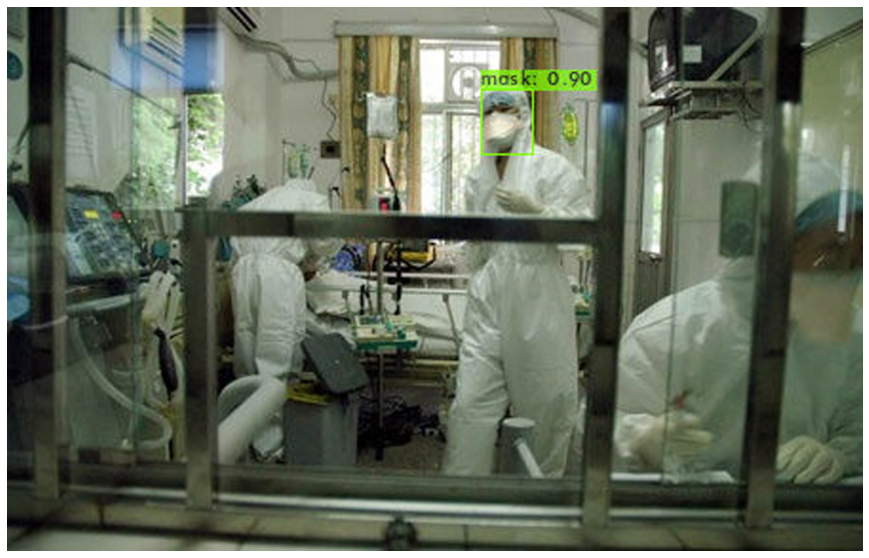

In [25]:

!./darknet detector test data/obj.data cfg/yolov3-custom2.cfg ./backup/yolov3-custom_last.weights data/318.jpg -dont_show predictions
imShow('predictions.jpg')